# author: Kevin Rohe
### version: 24/03/22
### Trajectories for two experimental settings and illustration in ternary diagram
Import libraries and settings

In [36]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import ternary as ternary
from IPython.display import display, Markdown

plt.rcParams['font.size'] = 22
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
cmap = 'rainbow'

## sympy-part

In [8]:
t,k1,k2,su,sv,F,Yu,Yv,pu,pv = sp.symbols("t k_1 k_2 s_u s_v F Y_u Y_v p_u p_v")#, real=True)
u,v,w = sp.symbols("u v w")#, real=True)

display(Markdown('### defining equation system'))
df = (Yu*F*su*(1-u-v) - k1*u - k2*u*v)
display(Markdown(r"$\frac{{du}}{{dt}}=$ {} $=0$".format(sp.latex(df, mode='inline'))))
dg = ((1-Yu)*F*sv*(1-u-v)**2 - k2*u*v)
display(Markdown(r"$\frac{{dv}}{{dt}}=$ {} $=0$".format(sp.latex(dg, mode='inline'))))
print()
display(Markdown('### solving in dependence for u, then for v'))
solu1 = sp.solve(df,u)[0]
display(Markdown(r"$u(v)=$ {}".format(sp.latex(solu1, mode='inline'))))
tempfac2 = (F*Yu*su+k1+k2*v)**2  #therefore following solution not allowed:  v = -(F*Y_u*s_u + k_1)/k_2
solv2 = sp.solve(sp.simplify(dg.subs(u,solu1))*tempfac2,v) #final solutions for v
display(Markdown(r"### and {} solutions for v with an average length of {} char in string".format(len(solv2),len(str(solv2[:]))/len(solv2))))

print()
display(Markdown('### solving in dependence for v, then for u'))
solv1 =sp.solve(df,v)[0]
display(Markdown(r"$v(u)=$ {}".format(sp.latex(solv1, mode='inline'))))
tempfac1 = (F*Yu*su+k2*u)**2 #therefore following solution not allowed: [-F*Y_u*s_u/k_2]
solu2 = sp.solve(sp.simplify(dg.subs(v,solv1))*tempfac1,u)
display(Markdown(r"### and {} solutions for u with an average length of {} char in string".format(len(solu2),len(str(solu2[:]))/len(solu2))))

J = sp.zeros(2,2)
for i, fi in enumerate([df,dg]):
    for j, s in enumerate([u,v]):
        J[i,j] = sp.diff(fi, s)
J = sp.simplify(J)

display(Markdown(r"### Jacobian matrix for stability analysis $J =$"))
display(J)

T = sp.simplify(sp.trace(J))
display(Markdown(r"Trace =  {}".format(sp.latex(T, mode='inline'))))
D = sp.simplify(sp.det(J))
display(Markdown(r"Determinant =  {}".format(sp.latex(D, mode='inline'))))


### defining equation system

$\frac{du}{dt}=$ $F Y_{u} s_{u} \left(- u - v + 1\right) - k_{1} u - k_{2} u v$ $=0$

$\frac{dv}{dt}=$ $F s_{v} \left(1 - Y_{u}\right) \left(- u - v + 1\right)^{2} - k_{2} u v$ $=0$

### solving in dependence for u, then for v

$u(v)=$ $\frac{F Y_{u} s_{u} \left(1 - v\right)}{F Y_{u} s_{u} + k_{1} + k_{2} v}$

### and 4 solutions for v with an average length of 1748.25 char in string

### solving in dependence for v, then for u

$v(u)=$ $\frac{- F Y_{u} s_{u} u + F Y_{u} s_{u} - k_{1} u}{F Y_{u} s_{u} + k_{2} u}$

### and 4 solutions for u with an average length of 2328.75 char in string

### Jacobian matrix for stability analysis $J =$

Matrix([
[              -F*Y_u*s_u - k_1 - k_2*v,                     -F*Y_u*s_u - k_2*u],
[-2*F*s_v*(Y_u - 1)*(u + v - 1) - k_2*v, -2*F*s_v*(Y_u - 1)*(u + v - 1) - k_2*u]])

Trace =  $- F Y_{u} s_{u} - 2 F s_{v} \left(Y_{u} - 1\right) \left(u + v - 1\right) - k_{1} - k_{2} u - k_{2} v$

Determinant =  $2 F Y_{u} k_{1} s_{v} u + 2 F Y_{u} k_{1} s_{v} v - 2 F Y_{u} k_{1} s_{v} + F Y_{u} k_{2} s_{u} u - F Y_{u} k_{2} s_{u} v - 2 F Y_{u} k_{2} s_{v} u^{2} + 2 F Y_{u} k_{2} s_{v} u + 2 F Y_{u} k_{2} s_{v} v^{2} - 2 F Y_{u} k_{2} s_{v} v - 2 F k_{1} s_{v} u - 2 F k_{1} s_{v} v + 2 F k_{1} s_{v} + 2 F k_{2} s_{v} u^{2} - 2 F k_{2} s_{v} u - 2 F k_{2} s_{v} v^{2} + 2 F k_{2} s_{v} v + k_{1} k_{2} u$

In [9]:
#dictionary with reaction parameter !!! not the most acurate way to do, but well enough
subdict = {su:1,sv:0.11,F:1.37/1.56,k1:1e13*sp.exp(-140000/(500*8.3145)),k2:1e5*sp.exp(-40000/(500*8.3145))}
#lambdify function system and define function
funcs = [sp.lambdify([u,v,Yu], f.subs(subdict)) for f in [df,dg]]

def solutions(x):
    sol = []
    for func in solv2[1:]:
        #lambdify v & u & using analytical expressions (and subdict) and using numerical u&v as variable for T&D (as well as Yu) 
        lamv = sp.lambdify([Yu],func.subs(subdict),'numpy')
        lamu = sp.lambdify([Yu],solu1.subs(v,func).subs(subdict),'numpy')
        lamT = sp.lambdify([Yu,u,v],T.subs(subdict),'numpy')
        lamD = sp.lambdify([Yu,u,v],D.subs(subdict),'numpy')
        #calculating u,v,T,D ensuring input is complex
        vy = lamv(x+0j)
        uy = lamu(x+0j)
        zT = lamT(x,uy,vy)
        zD = lamD(x,uy,vy)

        mask = (np.abs(np.imag(vy))<1e-9) * (np.abs(np.imag(uy))<1e-10) * (np.real(vy)>=0) * (np.real(uy)>=0) #mask for real+positive u&v
        stab_mask = (np.real(zT)< 0) * (np.real(zD)< 0) # mask for stable solutions
        unstab_mask = ((np.real(zT)> 0) + (np.real(zD)>0)) # mask for unstable solutions
        if sum([mask*unstab_mask]):sol.append([*np.real(uy[mask*unstab_mask]),*np.real(vy[mask*unstab_mask])])
    return sol

def diff1d(A):
    m = np.zeros_like(A)
    m[:,1:-1] = np.diff(A,n=2,axis=1)
    return m

## figure setup, first bistable, second monostable

In [138]:
L = 4
dx = 0.05
res = int(L//dx)+1
xspace = np.linspace(0,L,res)
diff1 = 0.002
diff2 = 0.001

coup = np.array([[diff1],[diff2]])/dx**2
Y_u = 80/1000.0
t = 0
tmax = 400
dt = 20

sol = solutions(Y_u)
print(sol)


p = np.zeros((2,res))
p[0,:res//2] = sol[0][0]
p[1,:res//2] = sol[0][1]
p[0,res//2:] = sol[1][0]
p[1,res//2:] = sol[1][1]
#p[0,0] = 1
#p[1,0] = 0
#p[0,-1] = 0
#p[1,-1] = 1

print(p)
data, time = [], []
data.append(p)
time.append(t)
while t <tmax: #loop for simple integration; doesn't need to be acurate for the figures here
    t = t + 1.0/dt
    step = (np.asarray([f(p[0,:], p[1,:], Y_u) for f in funcs])+coup*diff1d(p))
    step[0,0] = 0
    step[1,0] = 0
    step[0,-1] = 0
    step[1,-1] = 0
    p = p + step/dt
    time.append(t) #try walrus-operator when using python >=3.8
    data.append(p)
data = np.asarray(data)
X, Y = np.meshgrid(xspace, time)

[[0.5850409860203373, 0.003873690820363783], [0.04472798772393759, 0.18014258582790127]]
[[0.58504099 0.58504099 0.58504099 0.58504099 0.58504099 0.58504099
  0.58504099 0.58504099 0.58504099 0.58504099 0.58504099 0.58504099
  0.58504099 0.58504099 0.58504099 0.58504099 0.58504099 0.58504099
  0.58504099 0.58504099 0.58504099 0.58504099 0.58504099 0.58504099
  0.58504099 0.58504099 0.58504099 0.58504099 0.58504099 0.58504099
  0.58504099 0.58504099 0.58504099 0.58504099 0.58504099 0.58504099
  0.58504099 0.58504099 0.58504099 0.58504099 0.04472799 0.04472799
  0.04472799 0.04472799 0.04472799 0.04472799 0.04472799 0.04472799
  0.04472799 0.04472799 0.04472799 0.04472799 0.04472799 0.04472799
  0.04472799 0.04472799 0.04472799 0.04472799 0.04472799 0.04472799
  0.04472799 0.04472799 0.04472799 0.04472799 0.04472799 0.04472799
  0.04472799 0.04472799 0.04472799 0.04472799 0.04472799 0.04472799
  0.04472799 0.04472799 0.04472799 0.04472799 0.04472799 0.04472799
  0.04472799 0.04472799]
 [

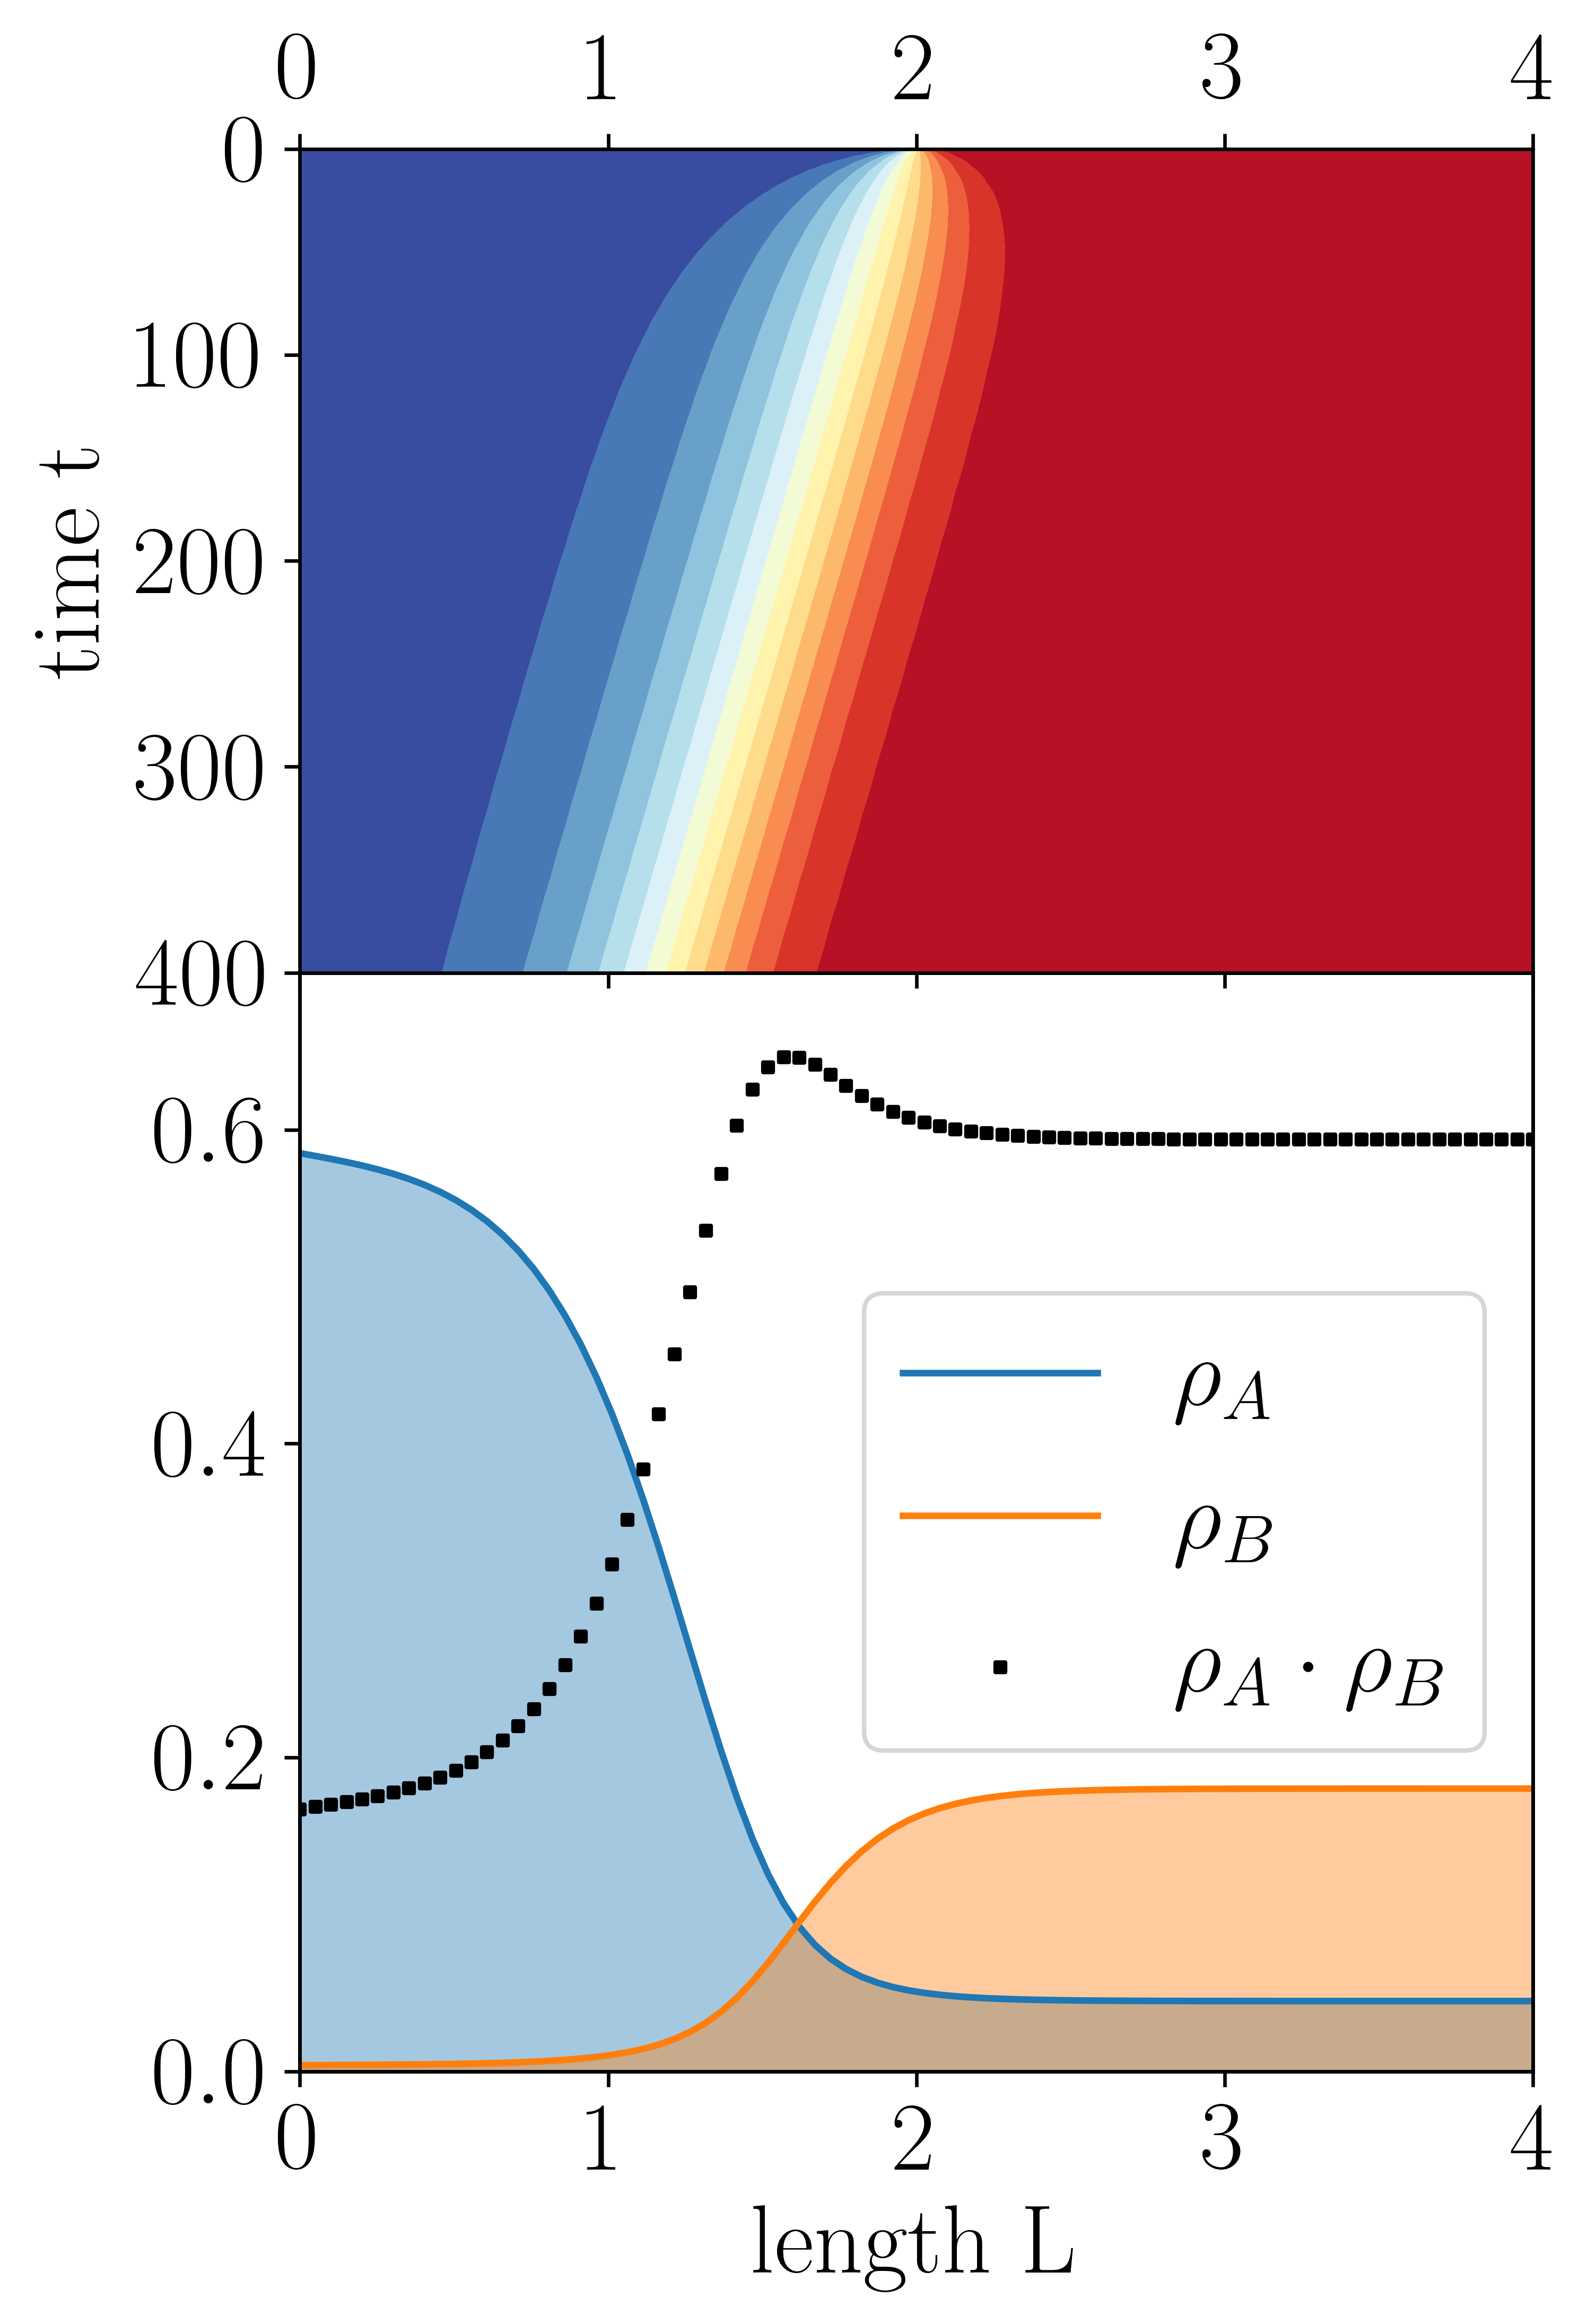

In [147]:
fig = plt.figure(figsize=(5,8),dpi=600)
#Layout
gs0 = fig.add_gridspec(2, 1, hspace=0.0,height_ratios=[3,4])
ax1 = fig.add_subplot(gs0[1])
ax2 = ax1.twinx()
ax3 = fig.add_subplot(gs0[0],sharex=ax1)

ax1.plot(xspace,data[-1,0,:],label=r'$\rho_{A}$')
ax1.plot(xspace,data[-1,1,:],label=r'$\rho_{B}$')
ax2.scatter(xspace,data[-1,1,:]*data[-1,0,:],s=5,marker='s',color='black',label=r'$\rho_{A} \cdot \rho_{B}$')

ax1.set_ylim(0,0.7)
ax2.set_ylim(0,0.0095)

ax3.contourf(X,Y, data[:,0,:],15,cmap = 'RdYlBu')#*data[:,1,:])
ax3.set_ylim(tmax,0)
ax1.set_xlabel('length L')
ax3.set_ylabel('time t')
ax3.tick_params('x', labelbottom=False,labeltop=True, top=True)

ax1.fill_between(xspace,data[-1,0,:], alpha=0.4)
ax1.fill_between(xspace,data[-1,1,:], alpha=0.4)
ax2.set_yticks([])

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(handles + handles2, labels + labels2,loc='center right')
#ax2.legend()

plt.savefig("front.pdf", dpi=600, bbox_inches="tight")
plt.show()

[[0.6148271633999318, 0.00317591475934308], [0.05577488108143297, 0.1509696515483794]]


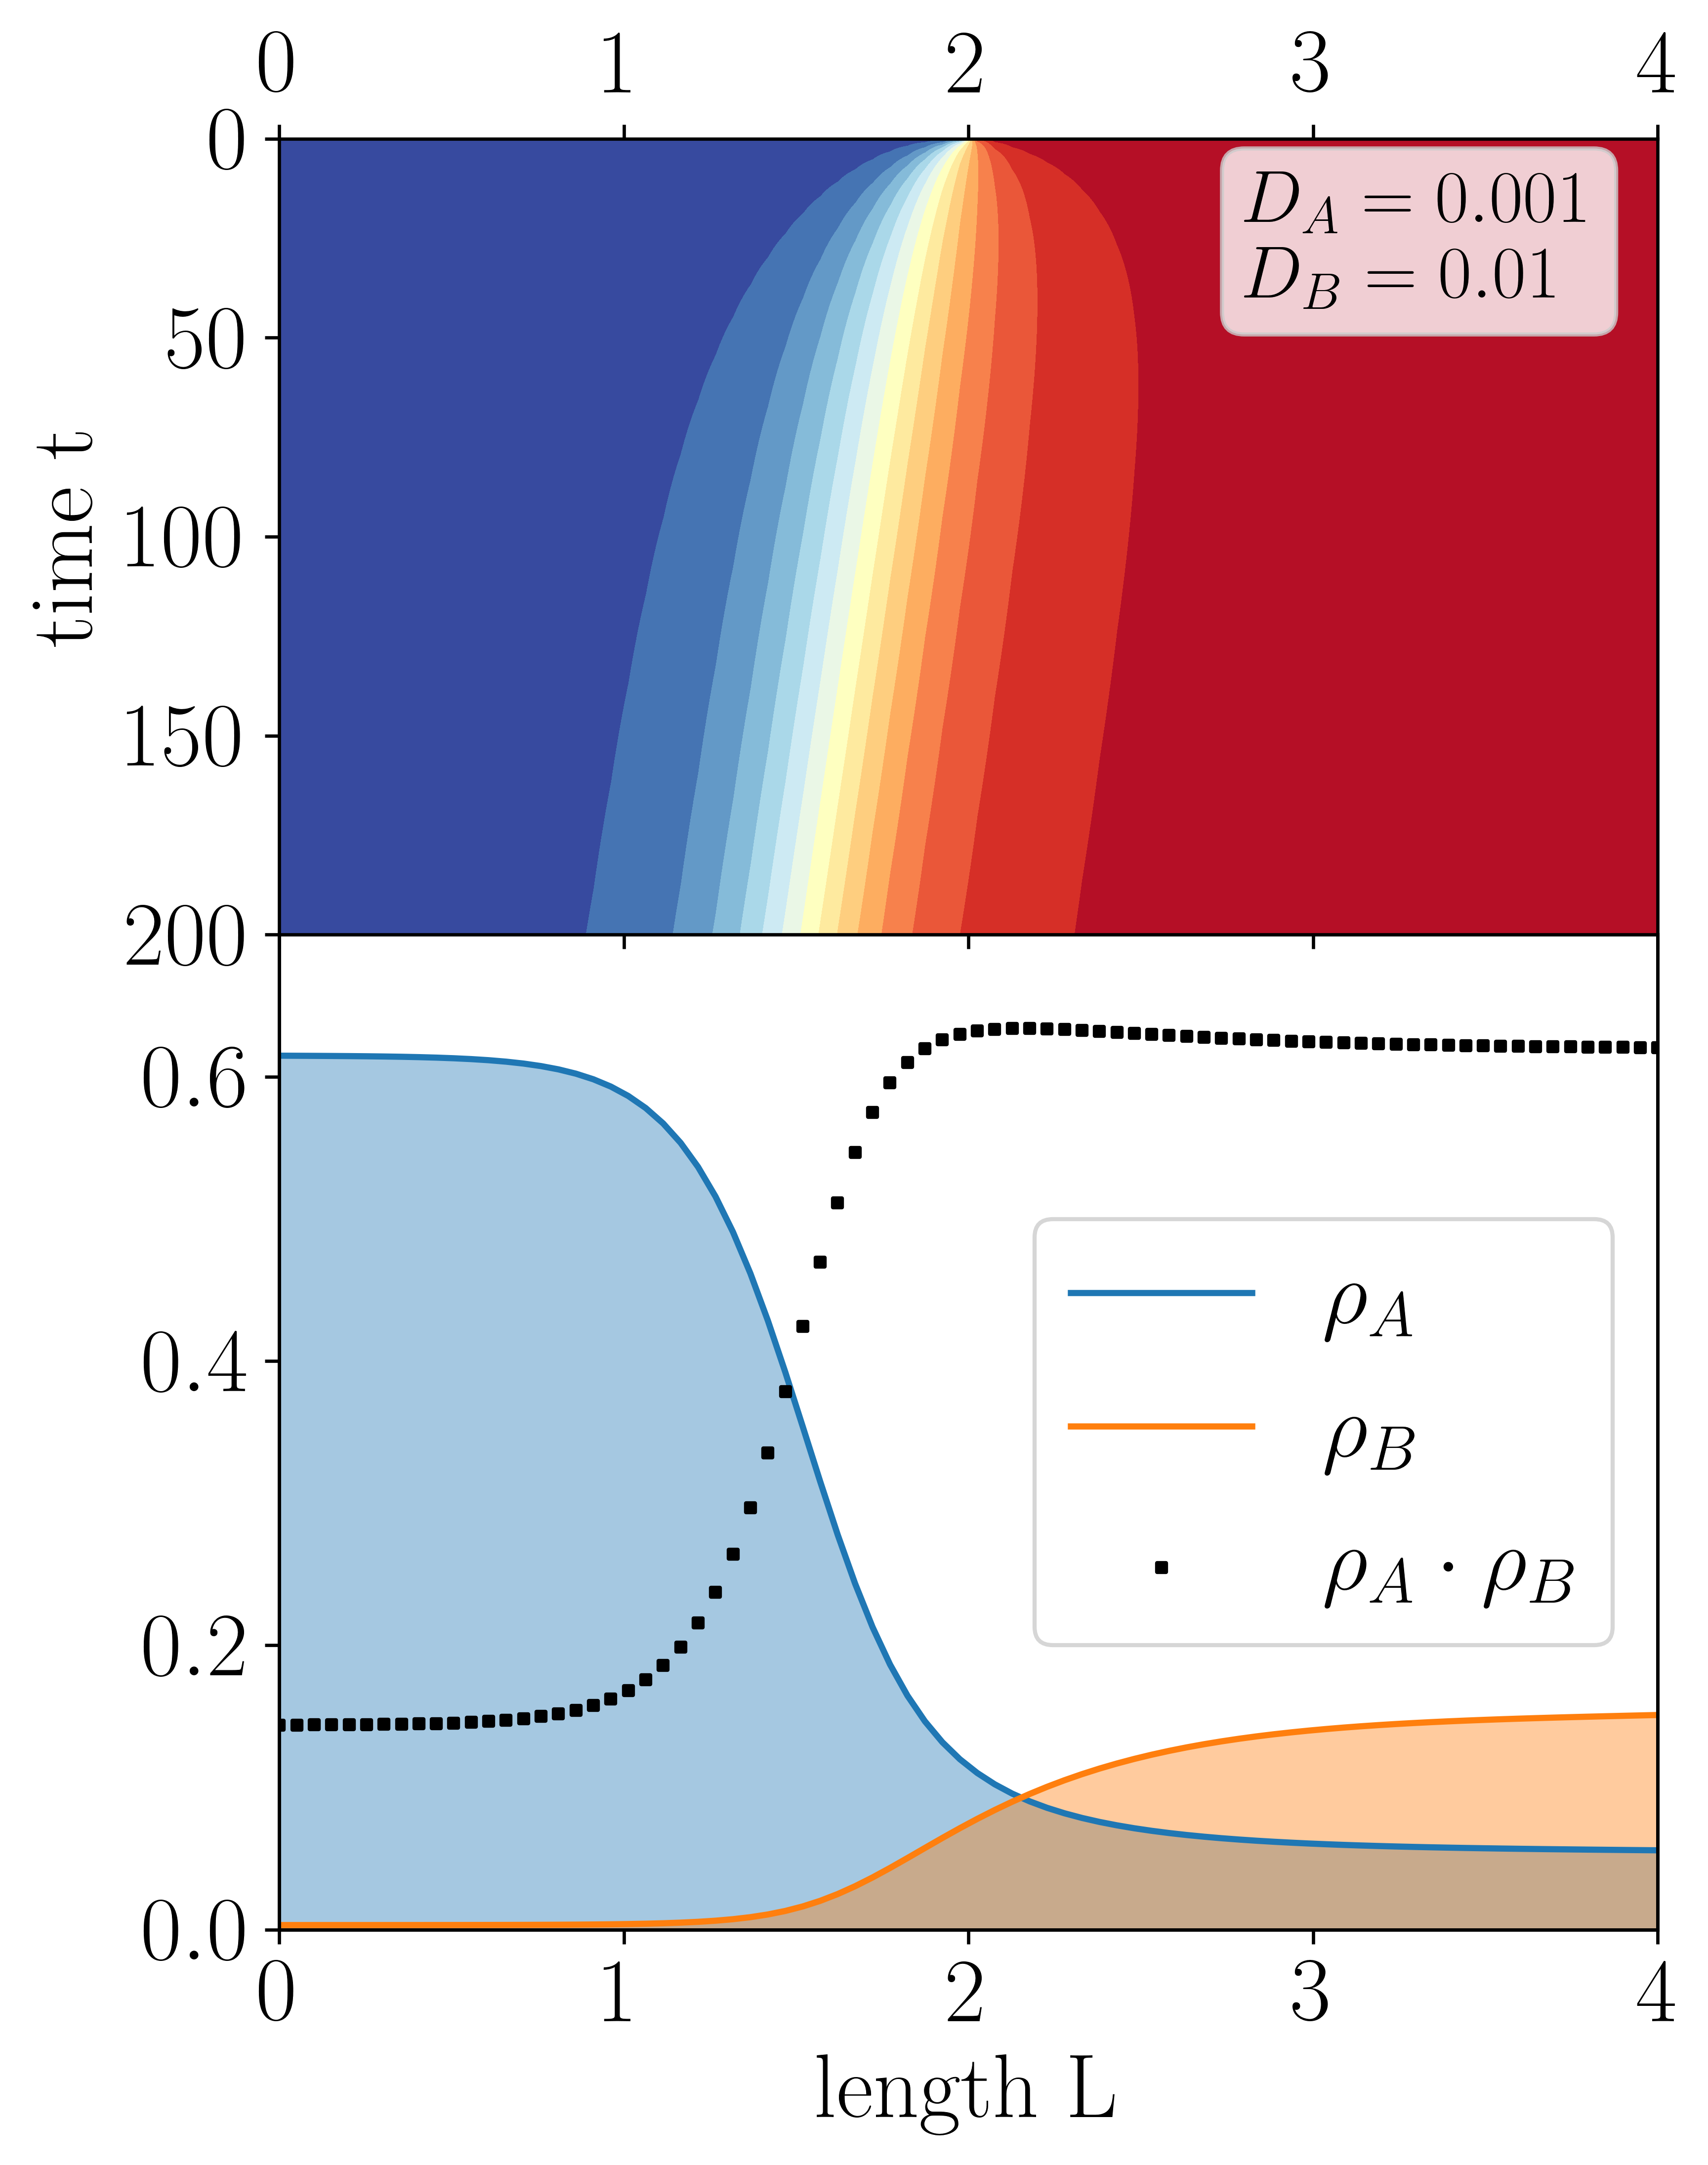

In [230]:
L = 4
dx = 0.05
res = int(L//dx)+1
xspace = np.linspace(0,L,res)
diff1 = 0.001
diff2 = 0.01

coup = np.array([[diff1],[diff2]])/dx**2
Y_u = 82/1000.0
t = 0
tmax = 200
dt = 20

sol = solutions(Y_u)
print(sol)


p = np.zeros((2,res))
p[0,:res//2] = sol[0][0]
p[1,:res//2] = sol[0][1]
p[0,res//2:] = sol[1][0]
p[1,res//2:] = sol[1][1]

data, time = [], []
data.append(p)
time.append(t)
while t <tmax: #loop for simple integration; doesn't need to be acurate for the figures here
    t = t + 1.0/dt
    step = (np.asarray([f(p[0,:], p[1,:], Y_u) for f in funcs])+coup*diff1d(p))
    #step[0,0] = 0
    #step[1,0] = 0
    #step[0,-1] = 0
    #step[1,-1] = 0
    p = p + step/dt
    time.append(t) #try walrus-operator when using python >=3.8
    data.append(p)
data = np.asarray(data)
X, Y = np.meshgrid(xspace, time)



fig = plt.figure(figsize=(6,8),dpi=600)
#Layout
gs0 = fig.add_gridspec(2, 1, hspace=0.0,height_ratios=[4,5])
ax1 = fig.add_subplot(gs0[1])
ax2 = ax1.twinx()
ax3 = fig.add_subplot(gs0[0],sharex=ax1)

ax1.plot(xspace,data[-1,0,:],label=r'$\rho_{A}$')
ax1.plot(xspace,data[-1,1,:],label=r'$\rho_{B}$')
ax2.scatter(xspace,data[-1,1,:]*data[-1,0,:],s=5,marker='s',color='black',label=r'$\rho_{A} \cdot \rho_{B}$')

ax1.set_ylim(0,0.7)
ax2.set_ylim(0,0.0095)

ax3.contourf(X,Y, data[:,0,:],15,cmap = 'RdYlBu')#*data[:,1,:])
ax3.set_ylim(tmax,0)
ax1.set_xlabel('length L')
ax3.set_ylabel('time t')
ax3.tick_params('x', labelbottom=False,labeltop=True, top=True)

ax1.fill_between(xspace,data[-1,0,:], alpha=0.4)
ax1.fill_between(xspace,data[-1,1,:], alpha=0.4)
ax2.set_yticks([])
ax3.text(2.8,40,r'$D_{{A}}={}$'.format(diff1)+'\n'+r'$D_{{B}}={}$'.format(diff2),fontsize=18,
         bbox={'edgecolor':'0.8', 'facecolor':'white','boxstyle':'round','alpha':0.8})

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(handles + handles2, labels + labels2,loc='center right')
#ax2.legend()

plt.savefig("front1.pdf", dpi=600, bbox_inches="tight")
plt.show()


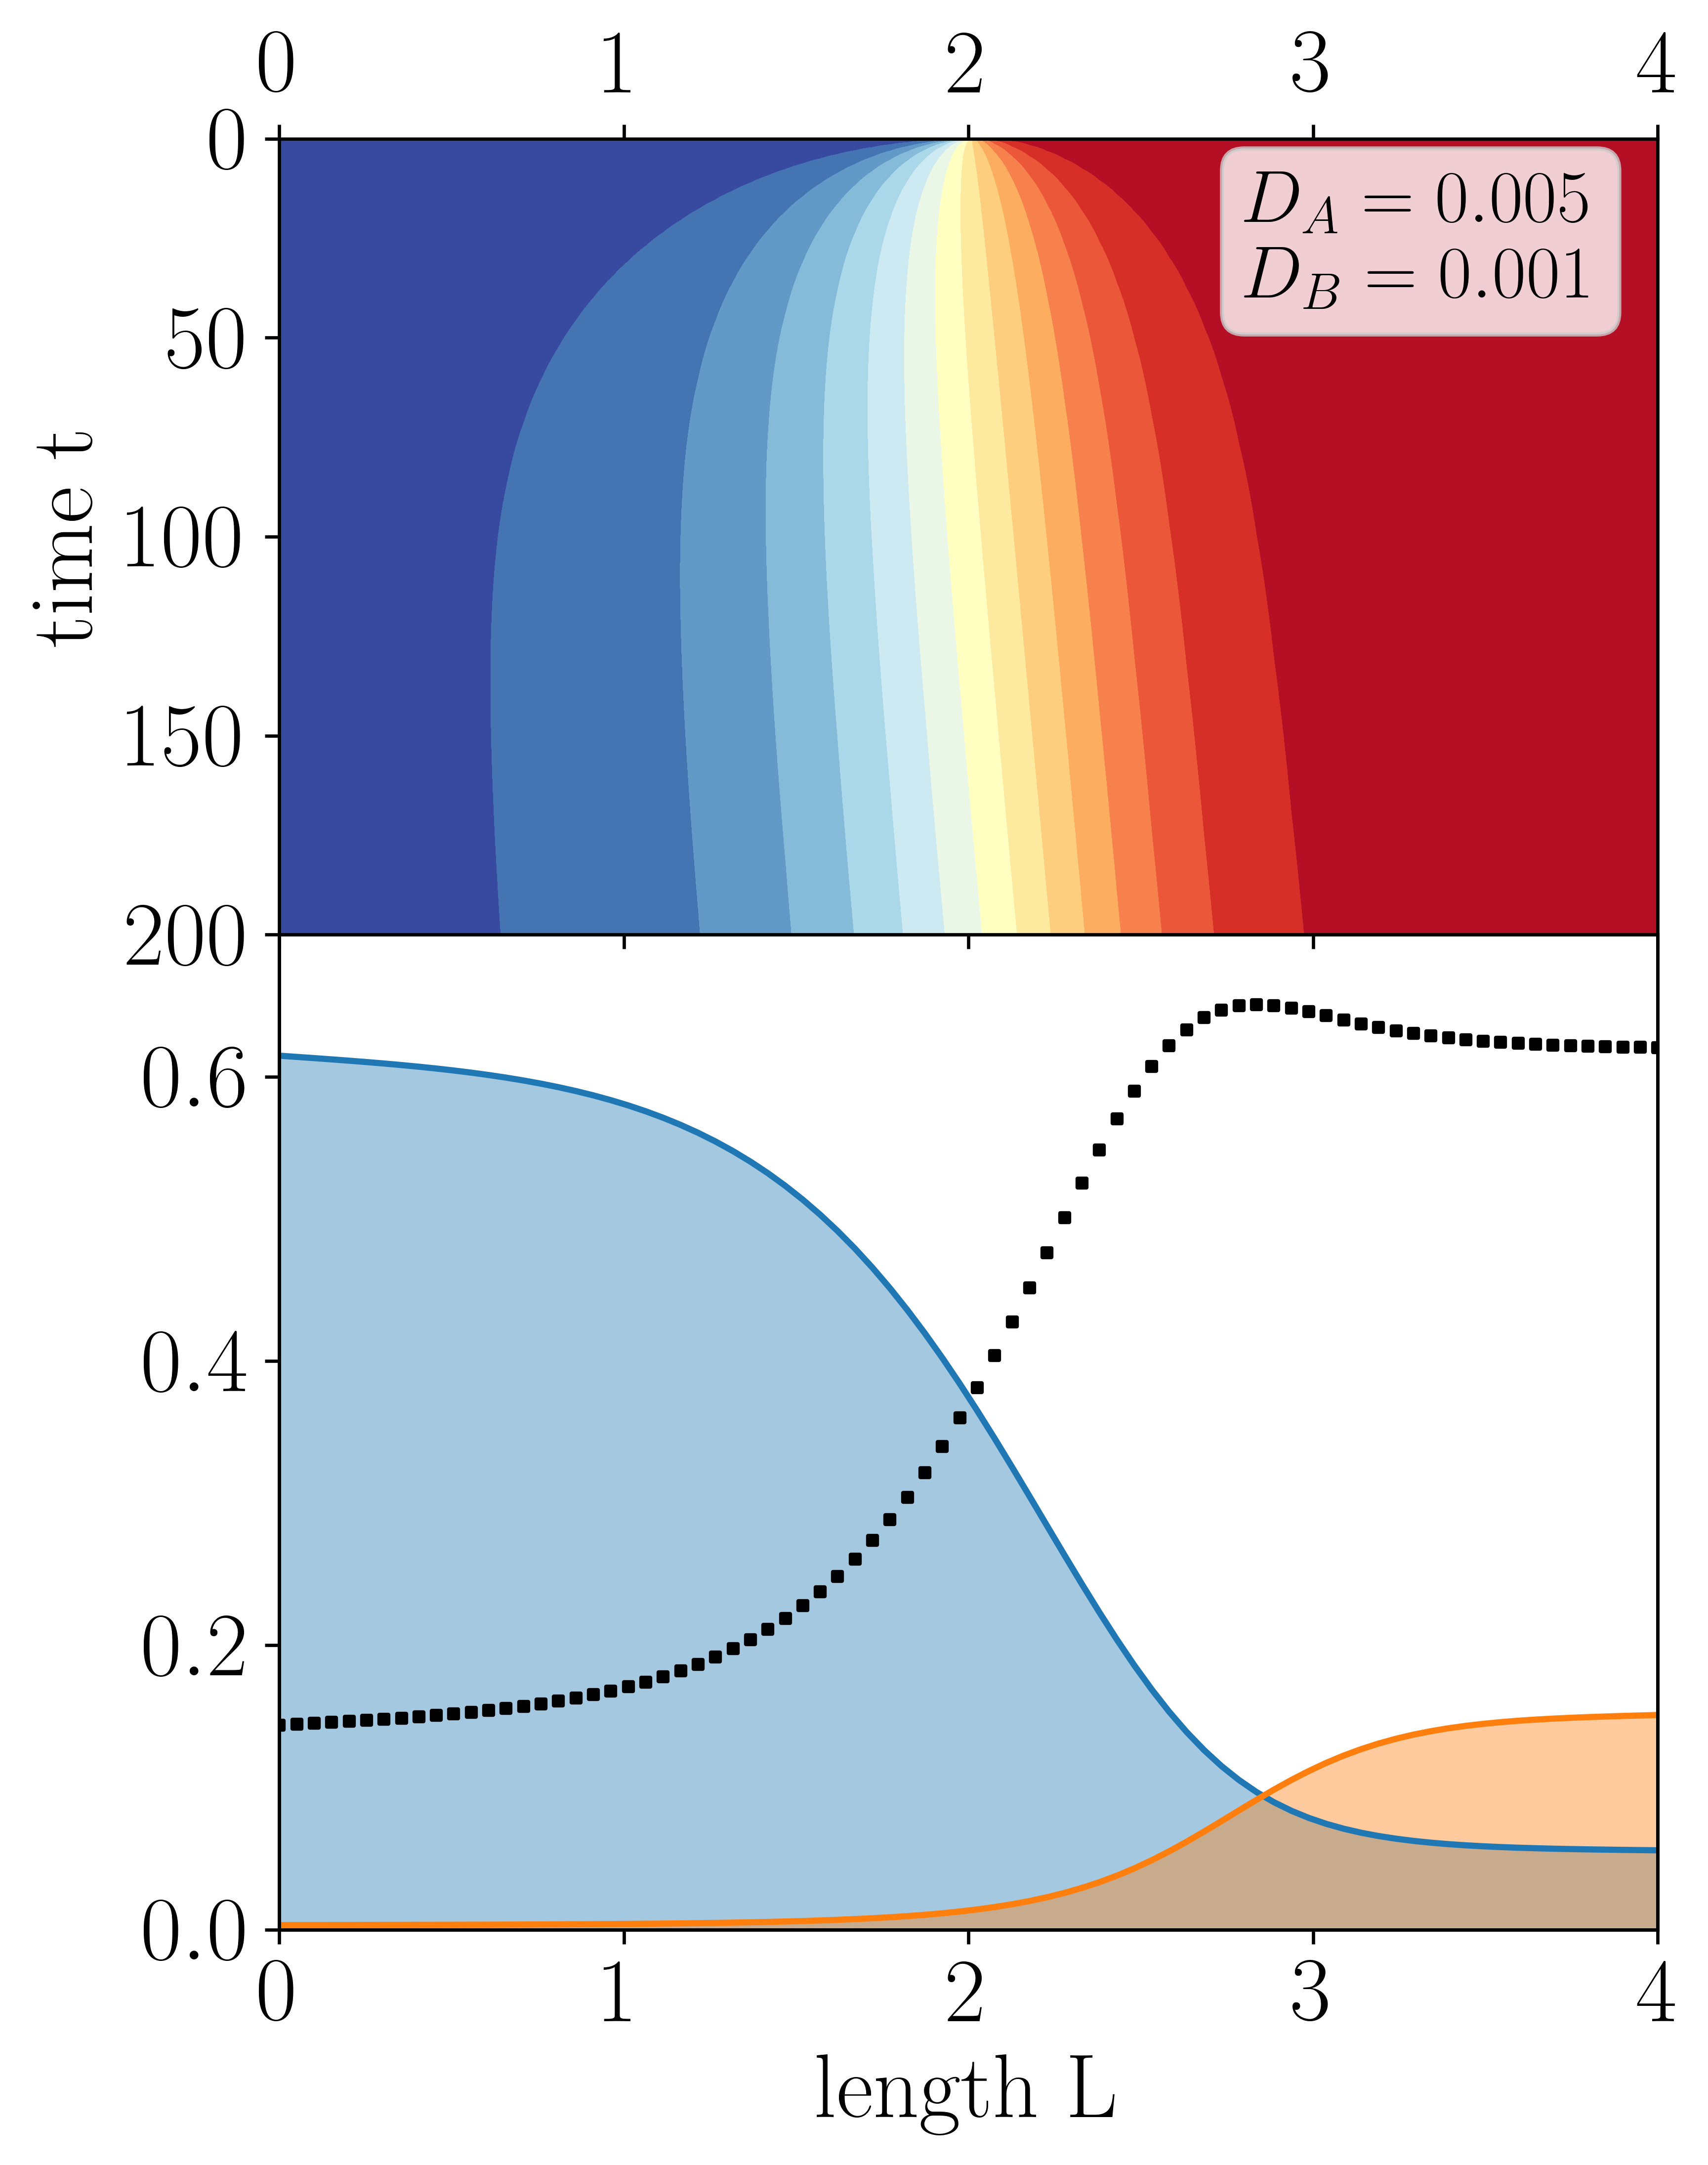

In [229]:
L = 4
dx = 0.05
res = int(L//dx)+1
xspace = np.linspace(0,L,res)
diff1 = 0.005
diff2 = 0.001

coup = np.array([[diff1],[diff2]])/dx**2
Y_u = 82/1000.0
t = 0
tmax = 200
dt = 20

sol = solutions(Y_u)

p = np.zeros((2,res))
p[0,:res//2] = sol[0][0]
p[1,:res//2] = sol[0][1]
p[0,res//2:] = sol[1][0]
p[1,res//2:] = sol[1][1]

data, time = [], []
data.append(p)
time.append(t)
while t <tmax: #loop for simple integration; doesn't need to be acurate for the figures here
    t = t + 1.0/dt
    step = (np.asarray([f(p[0,:], p[1,:], Y_u) for f in funcs])+coup*diff1d(p))
    p = p + step/dt
    time.append(t) #try walrus-operator when using python >=3.8
    data.append(p)
data = np.asarray(data)
X, Y = np.meshgrid(xspace, time)



fig = plt.figure(figsize=(6,8),dpi=600)
#Layout
gs0 = fig.add_gridspec(2, 1, hspace=0.0,height_ratios=[4,5])
ax1 = fig.add_subplot(gs0[1])
ax2 = ax1.twinx()
ax3 = fig.add_subplot(gs0[0],sharex=ax1)

ax1.plot(xspace,data[-1,0,:],label=r'$\rho_{A}$')
ax1.plot(xspace,data[-1,1,:],label=r'$\rho_{B}$')
ax2.scatter(xspace,data[-1,1,:]*data[-1,0,:],s=5,marker='s',color='black',label=r'$\rho_{A} \cdot \rho_{B}$')

ax1.set_ylim(0,0.7)
ax2.set_ylim(0,0.0095)

ax3.contourf(X,Y, data[:,0,:],15,cmap = 'RdYlBu')#*data[:,1,:])
ax3.set_ylim(tmax,0)
ax1.set_xlabel('length L')
ax3.set_ylabel('time t')
ax3.tick_params('x', labelbottom=False,labeltop=True, top=True)
ax3.text(2.8,40,r'$D_{{A}}={}$'.format(diff1)+'\n'+r'$D_{{B}}={}$'.format(diff2),fontsize=18,
         bbox={'edgecolor':'0.8', 'facecolor':'white','boxstyle':'round','alpha':0.8})

ax1.fill_between(xspace,data[-1,0,:], alpha=0.4)
ax1.fill_between(xspace,data[-1,1,:], alpha=0.4)
ax2.set_yticks([])

#handles, labels = ax1.get_legend_handles_labels()
#handles2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(handles + handles2, labels + labels2,loc='center right')

plt.savefig("front2.pdf", dpi=600, bbox_inches="tight")
plt.show()

